In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Getting Dataset Source --> Github # Databases

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/refs/heads/master/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df['total_bedrooms'].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

In [8]:
df['total_bedrooms'].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [9]:
df['total_bedrooms'].fillna(280.0, inplace=True)

In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
df.shape

(20640, 10)

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
df.drop(columns=['ocean_proximity'], axis=1, inplace=True)

In [15]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0


# Train test split

In [16]:
X = df.iloc[:,:-1]

In [17]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [18]:
y = df.iloc[:, -1]

In [19]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [21]:
X_train.shape

(16512, 8)

In [22]:
X_test.shape

(4128, 8)

In [25]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


# Feature scaling

In [24]:
scalar = StandardScaler()

In [26]:
X_train_scaled = scalar.fit_transform(X_train)

In [27]:
X_train_scaled

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.76827628,
         0.32290591, -0.326196  ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.09890135,
         0.6720272 , -0.03584338],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.44981806,
        -0.43046109,  0.14470145],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.28983345,
         0.07090859, -0.49697313],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.30830275,
         0.15490769,  0.96545045],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.04883375,
         1.94776365, -0.68544764]])

In [33]:
X_test_scaled = scalar.transform(X_test)

In [34]:
X_test_scaled

array([[ 0.25541734,  0.22194113, -0.30073951, ..., -0.02654818,
        -0.3578599 , -1.14237625],
       [ 0.02976613, -0.20947715,  0.098724  , ...,  0.12876364,
         0.22245041, -0.69050482],
       [-1.46454628,  1.03788441,  1.85636346, ..., -0.10016419,
         1.19995088, -0.18616932],
       ...,
       [-1.2689819 ,  0.80810728, -0.30073951, ...,  0.14671876,
         0.1811839 ,  2.87008893],
       [-0.120668  ,  0.5548835 ,  0.57808022, ..., -0.17467795,
        -0.06125685, -0.55565035],
       [ 0.57634349, -0.64089543, -0.93988113, ...,  0.22392579,
        -0.12831493, -0.14789765]])

# Build Model

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test_scaled)

In [36]:
y_pred

array([ 48459.79377924, 139576.54756466, 239469.42082312, ...,
       445949.22931257, 133824.54496332, 178362.54287171])

# Model Performance 

In [37]:
mse = mean_squared_error(y_test, y_pred)

In [38]:
mse

5102227113.312186

In [39]:
r2 = r2_score(y_test,y_pred)

In [40]:
r2

0.6106385717715821

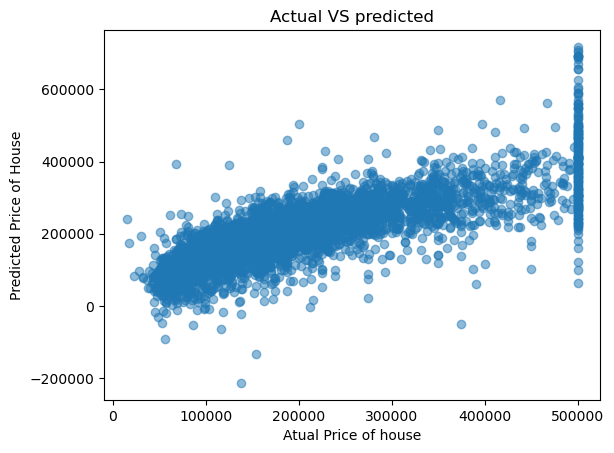

In [41]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel('Atual Price of house')
plt.ylabel('Predicted Price of House')
plt.title('Actual VS predicted')
plt.show()

In [42]:
# Correlation plot